# Библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# для подбора гипер параметров в моделях
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, \
                            confusion_matrix, precision_score, recall_score, f1_score
# метрики с функциями потерь

%matplotlib inline 
# отображает графику в юпитере
%config IPCompleter.greedy=True 
# должно ускорять работу таба

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import csv
from IPython.display import HTML, display

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.externals import joblib
# для сохранения обученных моделей

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, RidgeClassifier, \
                                 PassiveAggressiveClassifier, \
                                 LogisticRegressionCV

In [7]:
big = pd.read_csv('data_9', sep = '	')
big = big.drop('Unnamed: 0', axis = 1)

# Созданные функции

In [35]:
def con_mat(y_test, y_pred):
    array = confusion_matrix(y_test, y_pred)
    array = array / array.astype(np.float).sum(axis=1, keepdims=True) # нормализация
    df_cm = pd.DataFrame(array, index = ['-','PartOfAHorizontalPortScan','C&C','Attack','Okiru','DDoS','C&C-HeartBeat', \
            'C&C-Torii', 'FileDownload'],
                      columns = ['-','PartOfAHorizontalPortScan','C&C','Attack','Okiru','DDoS','C&C-HeartBeat', \
            'C&C-Torii', 'FileDownload'])
    plt.figure(figsize = (12,8))
    sns.heatmap(df_cm, annot=True);
# код для отображения матрицы ошибки

# Целевые признаки в исходных данных

In [10]:
big['string.5'].value_counts()

PartOfAHorizontalPortScan    50122
DDoS                         50001
Okiru                        50000
-                            37590
C&C-HeartBeat                33673
C&C                          21995
Attack                        9398
C&C-Torii                       30
FileDownload                    18
Name: string.5, dtype: int64

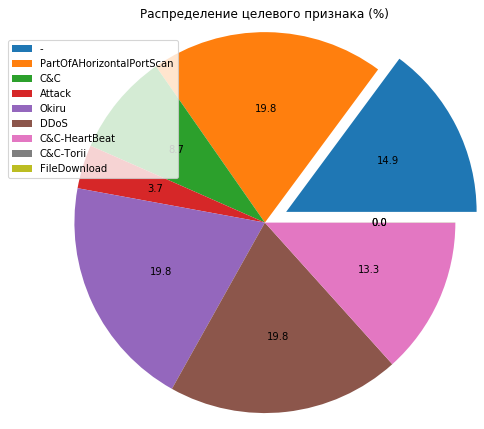

In [9]:
data_names = ['-','PartOfAHorizontalPortScan','C&C','Attack','Okiru','DDoS','C&C-HeartBeat', \
            'C&C-Torii', 'FileDownload']
data_values = [37590,50122,21995,9398,50000,50001,33673,30, 18]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 2160 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Распределение целевого признака (%)')

xs = range(len(data_names))

plt.pie( 
    data_values, autopct='%.1f', radius = 1.2,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'lower left', labels = data_names )
fig.savefig('pie.png')

In [14]:
plt.rcParams['figure.figsize'] = [15, 8]

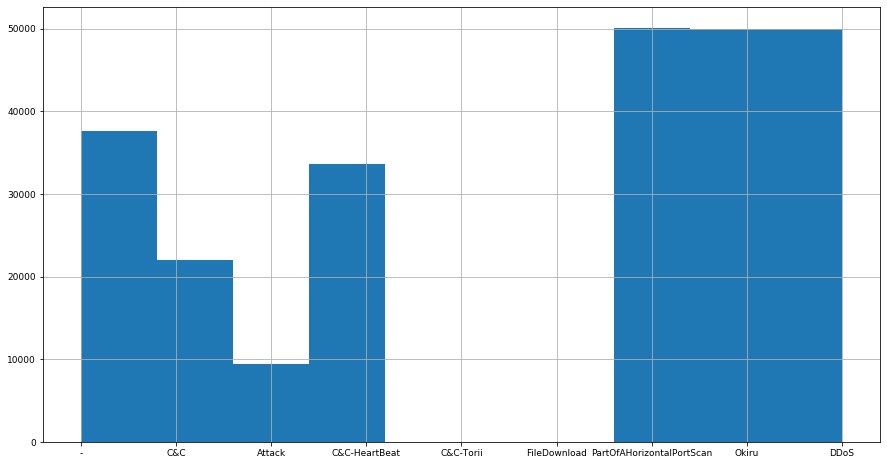

In [15]:
big['string.5'].hist();

In [16]:
big

,time,string,addr,port,addr.1,port.1,enum,string.1,interval,count,...,bool.1,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.4,string.5
0,2018-10-25 12:08:22.538640022,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,...,-,0,Dd,1,76,1,76,-,benign,-
1,2018-10-25 12:06:37.400158882,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,...,-,0,D,24,8208,0,0,-,benign,-
2,2018-10-25 12:09:45.734089136,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,...,-,0,Dd,1,76,1,76,-,benign,-
3,2018-10-25 12:17:11.302624941,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,...,-,0,ShAFf,5,212,3,144,-,benign,-
4,2018-10-25 12:17:11.265405178,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,...,-,0,Dd,1,62,1,339,-,benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252822,2019-01-10 19:24:42.003021002,Cfj5HY3cMlDfh8ditj,192.168.1.198,24104,113.143.214.4,23,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Benign,-
252823,2019-01-10 19:24:42.003023148,CTFcW32gJM2NWvembd,192.168.1.198,52989,36.145.90.154,23,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Benign,-
252824,2019-01-10 19:24:42.003026009,Cg9EYD4ALdZSvoZ8Bb,192.168.1.198,24104,110.96.5.249,23,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Benign,-
252825,2019-01-10 19:24:42.003027916,CqhKr946MGowZ0Be3j,192.168.1.198,52989,66.247.152.197,23,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Benign,-


In [18]:
big.describe()

,port,port.1,count.2,count.3,count.4,count.5,count.6
count,252827.000000,252827.000000,252827.000000,2.528270e+05,2.528270e+05,252827.000000,2.528270e+05
mean,36221.812813,18582.154169,0.727288,1.027374e+03,4.417957e+04,2.043255,1.555321e+03
std,18407.878039,22901.650196,47.128498,1.730383e+05,6.813547e+06,480.691320,6.954144e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,22968.500000,53.000000,0.000000,1.000000e+00,4.000000e+01,0.000000,0.000000e+00
50%,38370.000000,2323.000000,0.000000,1.000000e+00,7.600000e+01,0.000000,0.000000e+00
75%,51091.000000,37215.000000,0.000000,2.000000e+00,1.610000e+02,0.000000,0.000000e+00
max,65535.000000,65521.000000,7363.000000,6.602735e+07,1.914793e+09,239484.000000,3.496187e+08


In [19]:
big.corr()

,port,port.1,count.2,count.3,count.4,count.5,count.6
port,1.000000,-0.138060,0.009607,0.003696,0.003263,0.002157,0.001461
port.1,-0.138060,1.000000,-0.012441,-0.003623,-0.003271,-0.003157,-0.001764
count.2,0.009607,-0.012441,1.000000,-0.000034,-0.000036,0.021544,0.001341
count.3,0.003696,-0.003623,-0.000034,1.000000,0.804553,0.001432,0.001412
count.4,0.003263,-0.003271,-0.000036,0.804553,1.000000,0.001949,0.001902
count.5,0.002157,-0.003157,0.021544,0.001432,0.001949,1.000000,0.992201
count.6,0.001461,-0.001764,0.001341,0.001412,0.001902,0.992201,1.000000


# Обработка фрейма (удаление/изменение признаков)

In [20]:
labelencoder = LabelEncoder()

In [21]:
big.loc[big['string.5'] == '-', 'string.5'] = 0
big.loc[big['string.5'] == 'PartOfAHorizontalPortScan', 'string.5'] = 1
big.loc[big['string.5'] == 'C&C', 'string.5'] = 2
big.loc[big['string.5'] == 'Attack', 'string.5'] = 3
big.loc[big['string.5'] == 'Okiru', 'string.5'] = 4
big.loc[big['string.5'] == 'DDoS', 'string.5'] = 5
big.loc[big['string.5'] == 'C&C-HeartBeat', 'string.5'] = 6
big.loc[big['string.5'] == 'C&C-Torii', 'string.5'] = 7
big.loc[big['string.5'] == 'FileDownload', 'string.5'] = 8

In [22]:
big = big.drop('string', axis = 1)

big = big.drop('time', axis = 1)

big = big.drop('bool', axis = 1)
big = big.drop('bool.1', axis = 1)
big = big.drop('string.4', axis = 1)
# значения признаков bool и bool.1 одинаковы для всех наблюдений
# признак string.4 имеет частичный ответ ожидаемый от модели

big.loc[big['interval'] == '-', 'interval'] = '-1'
big.loc[big['count'] == '-', 'count'] = '-1'
big.loc[big['count.1'] == '-', 'count.1'] = '-1'

big['interval'] = big['interval'].astype(float)
big['count'] = big['count'].astype(int)
big['count.1'] = big['count.1'].astype(int)
# заменяем пропуски на значение -1 и приводим признаки к числовому типу

big["addr"] = labelencoder.fit_transform(big["addr"])
big["addr.1"] = labelencoder.fit_transform(big["addr.1"])
big["enum"] = labelencoder.fit_transform(big["enum"])
big["string.1"] = labelencoder.fit_transform(big["string.1"])
big["string.2"] = labelencoder.fit_transform(big["string.2"])
big["string.3"] = labelencoder.fit_transform(big["string.3"])
big["set[string]"] = labelencoder.fit_transform(big["set[string]"])
# преобразуем качественные признаки в числовые лабел энкодером (каждому значению признака присваиваем число)

In [23]:
big

,addr,port,addr.1,port.1,enum,string.1,interval,count,count.1,string.2,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.5
0,1709,58687,67767,123,2,0,0.114184,48,48,10,0,12,1,76,1,76,1,0
1,1709,1900,75195,1900,2,0,160.367579,7536,0,6,0,5,24,8208,0,0,1,0
2,1709,32893,67768,123,2,0,0.016986,48,48,10,0,12,1,76,1,76,1,0
3,1709,53395,62628,443,1,0,0.003497,0,0,10,0,140,5,212,3,144,1,0
4,1709,52801,41560,53,2,2,0.036724,34,311,10,0,12,1,62,1,339,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252822,1716,24104,3554,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1,0
252823,1716,52989,77180,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1,0
252824,1716,24104,2962,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1,0
252825,1716,52989,97490,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1,0


In [24]:
big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252827 entries, 0 to 252826
Data columns (total 18 columns):
addr           252827 non-null int32
port           252827 non-null int64
addr.1         252827 non-null int32
port.1         252827 non-null int64
enum           252827 non-null int32
string.1       252827 non-null int32
interval       252827 non-null float64
count          252827 non-null int32
count.1        252827 non-null int32
string.2       252827 non-null int32
count.2        252827 non-null int64
string.3       252827 non-null int32
count.3        252827 non-null int64
count.4        252827 non-null int64
count.5        252827 non-null int64
count.6        252827 non-null int64
set[string]    252827 non-null int32
string.5       252827 non-null int64
dtypes: float64(1), int32(9), int64(8)
memory usage: 26.0 MB


In [104]:
big.to_csv('BIG_1', sep = '	')

# Обучение классических моделей

In [25]:
y = big['string.5']
x = big.drop('string.5', axis = 1)

In [26]:
x

,addr,port,addr.1,port.1,enum,string.1,interval,count,count.1,string.2,count.2,string.3,count.3,count.4,count.5,count.6,set[string]
0,1709,58687,67767,123,2,0,0.114184,48,48,10,0,12,1,76,1,76,1
1,1709,1900,75195,1900,2,0,160.367579,7536,0,6,0,5,24,8208,0,0,1
2,1709,32893,67768,123,2,0,0.016986,48,48,10,0,12,1,76,1,76,1
3,1709,53395,62628,443,1,0,0.003497,0,0,10,0,140,5,212,3,144,1
4,1709,52801,41560,53,2,2,0.036724,34,311,10,0,12,1,62,1,339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252822,1716,24104,3554,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1
252823,1716,52989,77180,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1
252824,1716,24104,2962,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1
252825,1716,52989,97490,23,1,0,-1.000000,-1,-1,6,0,25,1,40,0,0,1


In [27]:
y

0         0
1         0
2         0
3         0
4         0
         ..
252822    0
252823    0
252824    0
252825    0
252826    0
Name: string.5, Length: 252827, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.6)

# Метод гауссовского наивного Байеса

In [29]:
grid_bayes = GaussianNB()

In [30]:
%%time
grid_bayes.fit(X_train, y_train)

Wall time: 46.1 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred = grid_bayes.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.5534321707087154

In [33]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

precision,recall,f1
0.7152960676000837,0.5534321707087154,0.46045831991662173


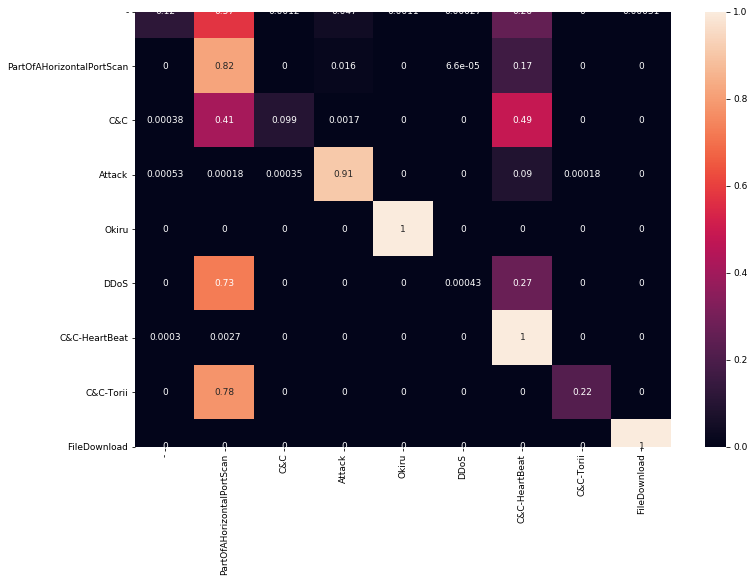

In [36]:
con_mat(y_test, y_pred)

In [37]:
joblib.dump(grid_bayes, 'grid_bayes_itog_2.pkl')

['grid_bayes_itog_2.pkl']

# Метод наивного Байеса на модели Бернулли

In [38]:
grid_ber_bayes = BernoulliNB()

In [39]:
%%time
grid_ber_bayes.fit(X_train, y_train)

Wall time: 453 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [40]:
y_pred = grid_ber_bayes.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.4434299953196174

In [43]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

precision,recall,f1
0.5368225108664038,0.4434299953196174,0.43735228808738336


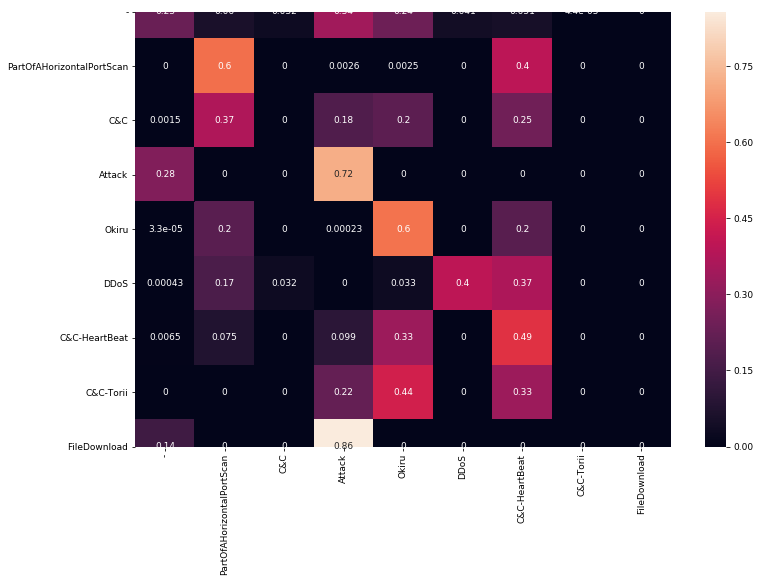

In [44]:
con_mat(y_test, y_pred)

In [45]:
joblib.dump(grid_ber_bayes, 'grid_ber_bayes_itog_2.pkl')

['grid_ber_bayes_itog_2.pkl']

# Метод KNN (К ближайших соседей)

In [46]:
grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid={'n_neighbors': range(1,15)},
                        cv = 5)

In [47]:
%%time
grid_knn.fit(X_train, y_train)

Wall time: 1min 12s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
y_pred = grid_knn.predict(X_test)

In [50]:
accuracy_score(y_test, grid_knn.predict(X_test))

0.9637237387687297

In [51]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

precision,recall,f1
0.9634361958811785,0.9637237387687297,0.9634766583432612


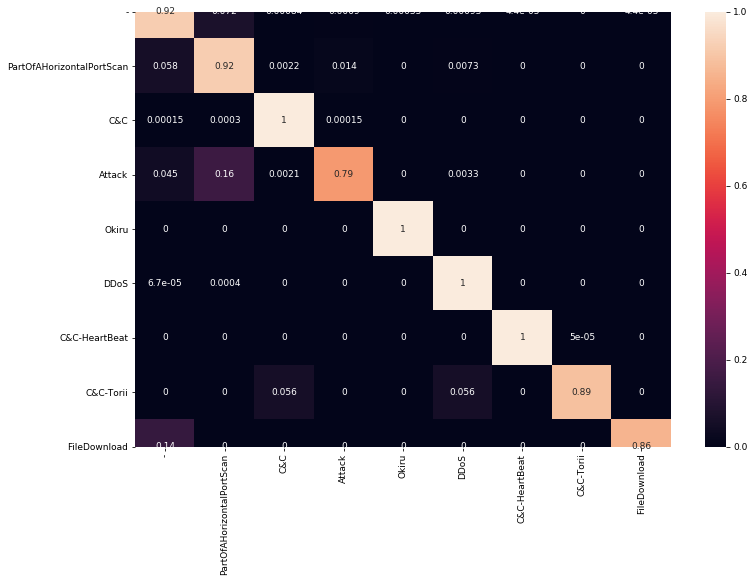

In [52]:
con_mat(y_test, y_pred)

In [55]:
joblib.dump(grid_knn, 'grid_knn_itog_2.pkl')

['grid_knn_itog_2.pkl']

# Метод логистической регресии

In [53]:
grid_logreg = LogisticRegression(n_jobs=-1)

In [54]:
%%time
grid_logreg.fit(X_train, y_train)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Wall time: 43.1 s


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = grid_logreg.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.5152507959946472

In [58]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

precision,recall,f1
0.48546634110790043,0.5152507959946472,0.4503544885729017


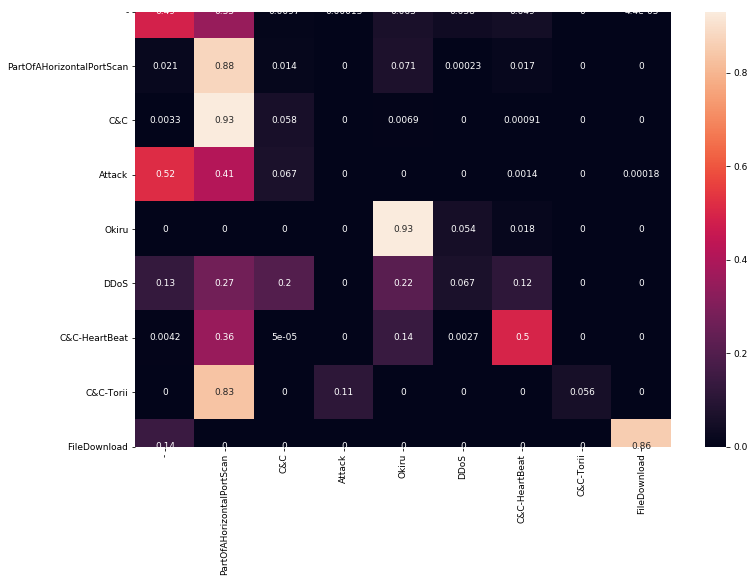

In [59]:
con_mat(y_test, y_pred)

In [60]:
joblib.dump(grid_logreg, 'grid_logreg_itog_2.pkl')

['grid_logreg_itog_2.pkl']

# Метод логистической регресии с CV (кросс валидацией)

In [61]:
grid_logregCV = LogisticRegressionCV(cv=3, n_jobs=-1)

In [62]:
%%time
grid_logregCV.fit(X_train, y_train)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iteratio

Wall time: 1min 3s


LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [63]:
y_pred = grid_logregCV.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.6768426534473325

In [65]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

precision,recall,f1
0.7132427224355712,0.6768426534473325,0.6553888198695498


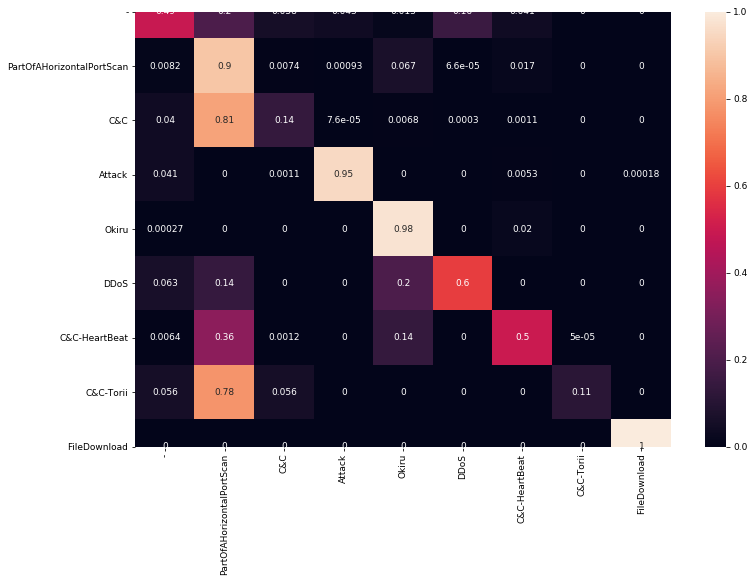

In [66]:
con_mat(y_test, y_pred)

In [67]:
joblib.dump(grid_logregCV, 'grid_logregCV_itog_2.pkl')

['grid_logregCV_itog_2.pkl']

# Метод пассивно-агрессивного классификатора

In [68]:
grid_passagg = PassiveAggressiveClassifier(n_jobs=-1)

In [69]:
%%time
grid_passagg.fit(X_train, y_train)

Wall time: 719 ms


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=-1, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [70]:
y_pred = grid_passagg.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.26576662689440134

In [72]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


precision,recall,f1
0.27732782210470547,0.26576662689440134,0.16313439541926353


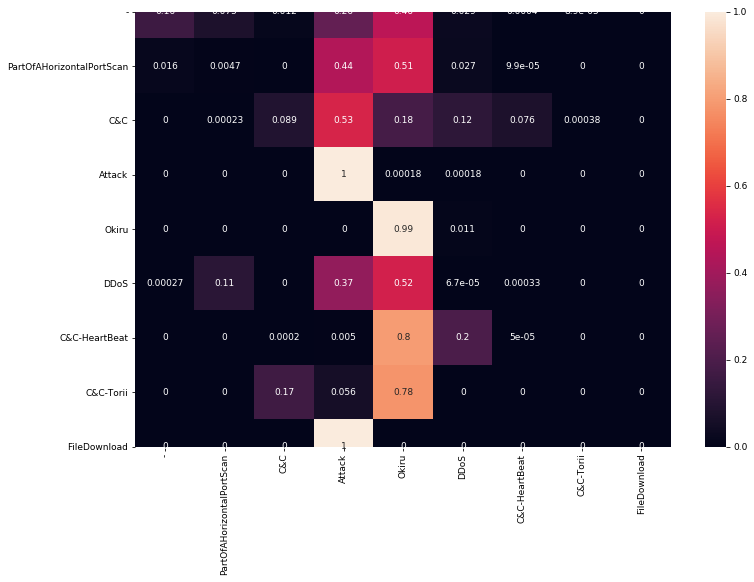

In [73]:
con_mat(y_test, y_pred)

In [74]:
joblib.dump(grid_passagg, 'grid_passagg_itog_2.pkl')

['grid_passagg_itog_2.pkl']

# Метод с использованием регрессии методом гребня

In [75]:
grid_ridge = RidgeClassifier()

In [79]:
%%time
grid_ridge.fit(X_train, y_train)

Wall time: 55.1 ms


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [80]:
y_pred = grid_ridge.predict(X_test)

In [81]:
accuracy_score(y_test, grid_ridge.predict(X_test))

0.6617599557011674

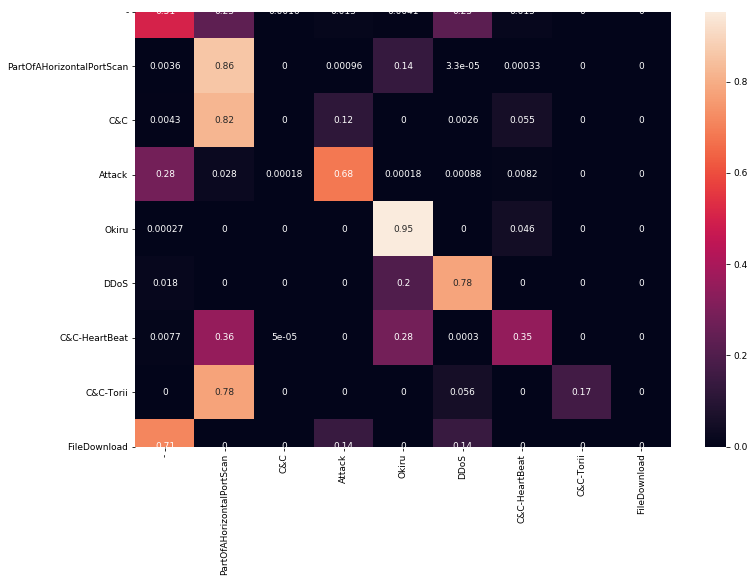

In [82]:
con_mat(y_test, y_pred)

In [83]:
joblib.dump(grid_ridge, 'grid_ridge_itog_2.pkl')

['grid_ridge_itog_2.pkl']

# Метод дерево решений

In [84]:
grid_tree = DecisionTreeClassifier()

In [85]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),
                    param_grid={'max_depth':range(1,13), \
                    'min_samples_leaf':range(1,8), \
                    'min_samples_split':range(2,10)}, 
                    cv = 3,
                    n_jobs=-1)
# подбор гипер параметров долог и бессмысленен, здесь и так высочайшая точность 

In [86]:
%%time
grid_tree.fit(X_train, y_train)

Wall time: 1min 18s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 13),
                         'min_samples_leaf': range(1, 8),
                         'mi

In [87]:
y_pred = grid_tree.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)

0.9994726329459382

In [89]:
pre = precision_score(y_test, y_pred, average = 'weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

data = [['precision','recall','f1'],
        [pre,rec,f1]]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

precision,recall,f1
0.9994751356188677,0.9994726329459382,0.99946098970248


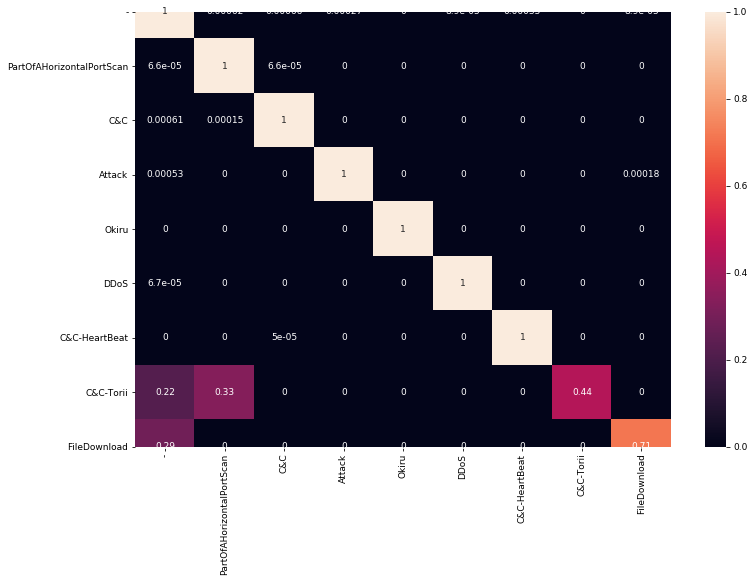

In [90]:
con_mat(y_test, y_pred)

In [91]:
joblib.dump(grid_tree, 'grid_tree_itog_2.pkl')

['grid_tree_itog_2.pkl']